In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [54]:
data = pd.read_csv("/home/yuliya/Downloads/Training_wells.csv")

train_data = pd.read_csv("/home/yuliya/Downloads/Training_wells.csv")
test_data = pd.read_csv("/home/yuliya/Downloads/test_data.csv")

In [55]:
train_data = train_data.drop('Well', axis=1)
test_data = test_data.drop('Well', axis=1)

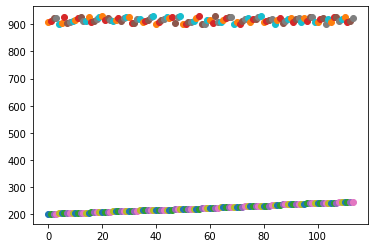

In [4]:
Xes = data.X
Yes = data.Y

point1 = []
point2 = []

for i in range(len(Xes)):
    point1.append(Xes[i])
    point2.append(Yes[i])
    
for i in range(len(point1)):
    plt.scatter([i], [point1[i]])
    plt.scatter([i], [point2[i]])
    


<AxesSubplot:>

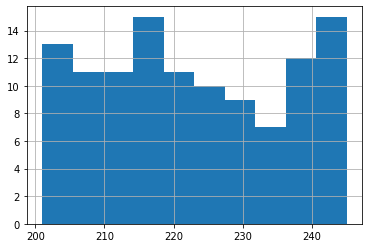

In [5]:
data.X.hist()

In [56]:
test_data['NTG'] = test_data['NTG'] * 1000

In [57]:
test_data.head()

,X,Y,NTG
0,226,928,332.2
1,244,912,246.3
2,237,919,238.1
3,211,919,390.1
4,224,915,377.5


In [58]:
# train_data.X.hist()

train_data['NTG'] = train_data['NTG'] * 1000

train_data.head()

,X,Y,NTG
0,201,907,200.6
1,201,914,362.4
2,201,924,438.1
3,202,925,402.1
4,203,902,262.8


In [59]:
# data = data.drop('Well', axis=1)
# test_data = test_data.drop('Well', axis=1)
test_data.head()

,X,Y,NTG
0,226,928,332.2
1,244,912,246.3
2,237,919,238.1
3,211,919,390.1
4,224,915,377.5


In [ ]:
# razn = []
# for i in range(0, 128):
#     x = data.loc[i].X
#     y = data.loc[i].Y
#     razn.append(y - x)

In [ ]:
data['Razn'] = razn

In [ ]:
data.shape

In [ ]:
data.head()

In [53]:
test_data.head()

,Well,X,Y,NTG
0,226-928,226,928,332.2
1,244-912,244,912,246.3
2,237-919,237,919,238.1
3,211-919,211,919,390.1
4,224-915,224,915,377.5


In [60]:
# test_data = data[0:38]
# train_data = data[38:]
train_data = data
test_Y = test_data['NTG']
test_data = test_data.drop(['NTG'], axis=1)

In [61]:
test_data.head()

,X,Y
0,226,928
1,244,912
2,237,919
3,211,919
4,224,915


In [ ]:
test_data.isnull().sum()

In [62]:
y = train_data['NTG']
X = train_data.drop(['NTG'], axis=1)

In [66]:
train_data.head()

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-925,202,925,0.4021
4,203-902,203,902,0.2628


In [65]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X, y)
predicted = forest_model.predict(test_data)

In [13]:
mean_squared_error(test_Y, predicted)

0.00378326999370833

In [14]:
test_Y.head(10)

0    0.3322
1    0.2463
2    0.2381
3    0.3901
4    0.3775
5    0.2386
6    0.2778
7    0.1897
8    0.3769
9    0.2775
Name: NTG, dtype: float64

In [15]:
predicted

array([0.369578, 0.345174, 0.275336, 0.376696, 0.348149, 0.304812,
       0.299939, 0.25028 , 0.335288, 0.356704, 0.292542, 0.281946,
       0.301982, 0.345276, 0.473071, 0.401777, 0.323357, 0.346993,
       0.335532, 0.382635, 0.290143, 0.312594, 0.346637, 0.37068 ])

In [ ]:
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(test_data)
mean_squared_error(test_Y, predicted)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.09, n_jobs=4)
my_model.fit(X, y, eval_set=[(X, y)], verbose=False)

predictions = my_model.predict(test_data)
mean_squared_error(test_Y, predictions)

In [67]:
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(X)
regression = LinearRegression()
model = regression.fit(features_interaction, y)

ValueError: could not convert string to float: '201-907'

In [16]:
preps_data = train_data
arr1 = []
arr2 = []
arr3 = []
for i in range(len(train_data.X)):
    arr1.append(train_data.X[i] ** 2)
    arr2.append(train_data.X[i] * train_data.Y[i])
    arr3.append(train_data.Y[i] ** 2)
    
preps_data['X2'] = arr1
preps_data['XY'] = arr2
preps_data['Y2'] = arr3

preps_data.head()

preps_data = test_data
arr1 = []
arr2 = []
arr3 = []
for i in range(len(test_data.X)):
    arr1.append(train_data.X[i] ** 2)
    arr2.append(train_data.X[i] * train_data.Y[i])
    arr3.append(train_data.Y[i] ** 2)
    
preps_data['X2'] = arr1
preps_data['XY'] = arr2
preps_data['Y2'] = arr3
    
test_data.head()

,X,Y,X2,XY,Y2
0,226,928,40401,182307,822649
1,244,912,40401,183714,835396
2,237,919,40401,185724,853776
3,211,919,40804,186850,855625
4,224,915,41209,183106,813604


In [19]:
y = train_data['NTG']
X = train_data.drop(['NTG'], axis=1)

In [20]:
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(test_data)
mean_squared_error(test_Y, predicted)

28.04650338016393

In [21]:
predicted

array([-1.60832880e+00,  7.40989670e+00,  7.18913526e+00,  3.34340774e+00,
       -2.29035429e-02, -4.23745610e-01,  9.31893040e+00, -4.87870199e-02,
        2.64983120e+00, -1.41667150e+00,  4.90281399e+00,  2.61834649e+00,
        1.14461598e+01,  5.48760460e-03,  8.89054363e+00,  1.65255540e+00,
       -1.04846284e+00, -3.69105402e+00,  9.93868906e-01,  7.39209195e+00,
        9.56357603e+00,  3.63094986e+00,  2.81330031e+00,  8.96307440e+00])